<a href="https://colab.research.google.com/github/alisha006/creditcard_fraud/blob/main/Price_predict_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib as ta

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4087    0  4087    0     0  10347      0 --:--:-- --:--:-- --:--:-- 10346
100  517k  100  517k    0     0   285k      0  0:00:01  0:00:01 --:--:-- 1244k
--2025-04-28 14:35:34--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.144.37, 104.19.145.37, 2606:4700::6813:9125, ...
Connecting to anaconda.org (anaconda.org)|104.19.144.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/Beximco Pharmaceuticals Stock Price History (1).csv')
df.rename(columns={'Price': 'Close', 'Vol.': 'Volume'}, inplace=True)
for col in ['Open', 'High', 'Low', 'Close']:
  df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

    # Volume conversion
df['Volume'] = df['Volume'].astype(str).replace('-', '0')
df['Volume'] = df['Volume'].str.replace('K', '').str.replace('M', '')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df = df.dropna()


In [ ]:
df['rsi'] = ta.RSI(df['Close'])
df['macd'] = ta.MACD(df['Close'])[2]  # MACD output is a tuple, index 2 for macd_diff
df['ema_20'] = ta.EMA(df['Close'], timeperiod=20)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Date,Close,Open,High,Low,Volume,Change %,rsi,macd,ema_20
33,11/10/2024,82.70,83.40,84.40,81.00,819.31,0.24%,47.690423,-0.026747,84.450483
34,11/07/2024,82.50,77.60,83.00,76.70,2.45,6.31%,47.302603,-0.191562,84.264723
35,11/06/2024,77.60,74.10,78.70,72.80,1.47,1.97%,38.946275,-0.600939,83.629987
36,11/05/2024,76.10,74.20,77.80,74.20,1.06,2.70%,36.802927,-0.923791,82.912846
37,11/04/2024,74.10,74.40,74.70,73.30,329.71,-0.13%,34.107659,-1.205292,82.073527
...,...,...,...,...,...,...,...,...,...,...
1157,01/07/2020,57.55,57.73,59.55,57.09,93.95,-0.94%,41.149157,-0.563596,59.834113
1158,01/06/2020,58.09,59.27,60.64,57.73,149.23,-2.44%,42.810339,-0.276176,59.668007
1159,01/05/2020,59.55,62.36,62.36,59.27,97.74,-3.68%,47.153672,0.032515,59.656768
1160,01/02/2020,61.82,61.73,63.00,61.27,251.62,1.34%,53.115659,0.389975,59.862790


<Axes: >

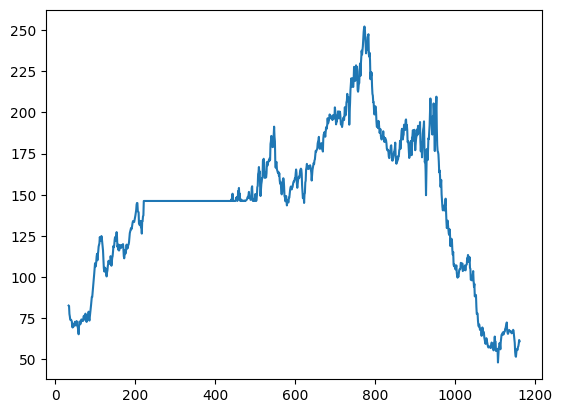

In [ ]:
df['Close'].plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'rsi', 'macd', 'ema_20']
df[scaled_features] = scaler.fit_transform(df[scaled_features])


In [ ]:
#define the feature and target variable
features = ['Open', 'High', 'Low', 'Volume', 'rsi', 'macd', 'ema_20']
target = 'Close'


In [ ]:
#split the data into training and testing
split_index = int(0.8 * len(df))
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]


XGB

In [ ]:
#Create and train the model
model=xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#make and show prediction on test data
predictions=model.predict(test_data[features])
print('Model Predictions:')
print(predictions)


Model Predictions:
[0.7057018  0.724339   0.7693683  0.7291801  0.7247162  0.7185619
 0.6600025  0.696134   0.7554458  0.72235227 0.77203304 0.7122726
 0.67470235 0.65178484 0.69424826 0.72019565 0.7181497  0.75456095
 0.69476515 0.6449294  0.6375767  0.6470105  0.6140875  0.5827297
 0.56689805 0.56652474 0.5474832  0.5290983  0.5448341  0.53943646
 0.50116116 0.48012158 0.47425902 0.47182694 0.471836   0.470505
 0.47195336 0.4685366  0.47705206 0.47598282 0.48123434 0.45518053
 0.40993977 0.39349645 0.40710154 0.42426243 0.40691367 0.39253864
 0.39368004 0.39429316 0.3938706  0.37886414 0.376631   0.3703538
 0.37023437 0.36847818 0.35405716 0.31936172 0.32019317 0.3012639
 0.30096993 0.28566194 0.2903526  0.28566194 0.28534544 0.2860514
 0.2904334  0.28866526 0.28000575 0.27334276 0.27375573 0.27305594
 0.2737396  0.26999718 0.27039006 0.26811907 0.26809388 0.27747223
 0.29157346 0.2847621  0.28244486 0.2918709  0.27519897 0.26892087
 0.27221847 0.27626833 0.27053303 0.28368333 0.2762

In [ ]:
# show the actual value
print('Actual Values:')
print(test_data[target])

Actual Values:
936     0.705767
937     0.744998
938     0.785700
939     0.735681
940     0.721459
          ...   
1157    0.045949
1158    0.048597
1159    0.055757
1160    0.066889
1161    0.062868
Name: Close, Length: 226, dtype: float64


In [ ]:
# show the models accuracy
accuracy=model.score(test_data[features], test_data[target])
print('Model Accuracy:', accuracy)

Model Accuracy: 0.9851449925524713


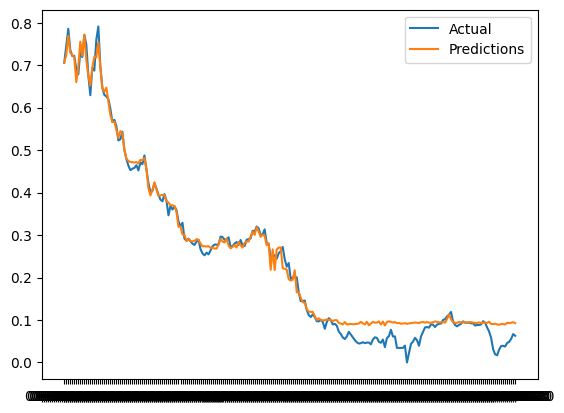

In [ ]:
#plot the prediction and close price
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(test_data['Date'].iloc[:len(predictions)], predictions, label='Predictions')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

preds = model.predict(test_data[features])
mse = mean_squared_error(test_data[target], preds)
print("MSE:", f"{mse: .4f}")
rmse = np.sqrt(mse)
print("RMSE:", f"{rmse:.4f}")
mae = mean_absolute_error(test_data[target], preds)
print("MAE:",  f"{mae:.4f}")



MSE:  0.0007
RMSE: 0.0255
MAE: 0.0178


MLP

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer



# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
train_data[features] = imputer.fit_transform(train_data[features])

# Now, you can create and train your MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)
model.fit(train_data[features], train_data[target])


<ipython-input-45-fb34543bfa70>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[features] = imputer.fit_transform(train_data[features])


MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500)

In [ ]:
#make and show prediction on test data
predictions=model.predict(test_data[features])
print('Model Predictions:')
print(predictions)
# show the models accuracy
accuracy=model.score(test_data[features], test_data[target])
print('Model Accuracy:', accuracy)



Model Predictions:
[0.71307635 0.73371459 0.76434154 0.74704242 0.74260922 0.73106509
 0.68895654 0.70167678 0.7278231  0.72166182 0.75134786 0.72439289
 0.68545325 0.65666546 0.67908826 0.69771208 0.71152755 0.7485677
 0.68711801 0.65693604 0.63445442 0.630772   0.61341409 0.58467339
 0.5734855  0.56671347 0.54673378 0.53364188 0.53065337 0.53006617
 0.50192373 0.4842624  0.47023611 0.46356174 0.46077801 0.46158427
 0.45598269 0.45915256 0.47296297 0.48061068 0.48486822 0.47235039
 0.44441396 0.42339307 0.42777725 0.43203617 0.42028967 0.41179136
 0.40456116 0.4015997  0.40580564 0.38657729 0.38292455 0.38154715
 0.38538654 0.38157118 0.36895376 0.3573366  0.35294257 0.3356838
 0.32670812 0.31922062 0.31556313 0.31445536 0.31059082 0.31255454
 0.31428184 0.30837222 0.30068222 0.29590135 0.29465838 0.28933259
 0.29334493 0.29966436 0.30671218 0.3088784  0.30906756 0.31518273
 0.32002818 0.31700937 0.31686943 0.31880978 0.30681765 0.30142177
 0.3050416  0.30535526 0.29960187 0.30313244 

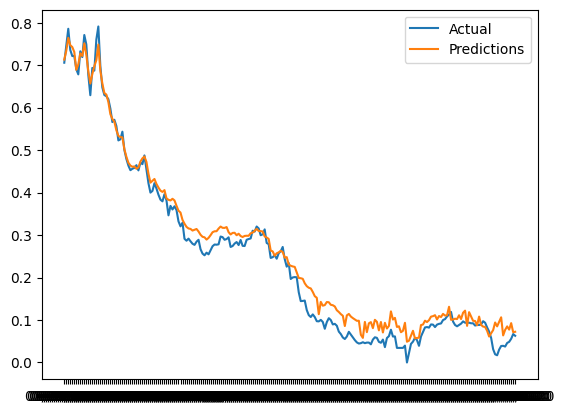

MSE:  0.0009
RMSE: 0.0294
MAE: 0.0242


In [ ]:
#plot the prediction and close price
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.legend()
plt.show()



preds = model.predict(test_data[features])
mse = mean_squared_error(test_data[target], preds)
print("MSE:", f"{mse: .4f}")
rmse = np.sqrt(mse)
print("RMSE:", f"{rmse:.4f}")
mae = mean_absolute_error(test_data[target], preds)
print("MAE:",  f"{mae:.4f}")







Linear Regression (Baseline)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_data[features], train_data[target])


LinearRegression()

In [ ]:
#make and show prediction on test data
predictions=model.predict(test_data[features])
print('Model Predictions:')
print(predictions)
# show the models accuracy
accuracy=model.score(test_data[features], test_data[target])
print('Model Accuracy:', accuracy)



Model Predictions:
[0.71153145 0.7370916  0.7716968  0.74435259 0.72922433 0.71965983
 0.68009882 0.69267528 0.74202621 0.72583309 0.7842556  0.74107698
 0.68183527 0.65516232 0.68675482 0.71774185 0.72138195 0.76224825
 0.70367048 0.64892344 0.62922934 0.64621863 0.61545337 0.59862349
 0.57486397 0.57275745 0.55382866 0.52590412 0.53774427 0.53967796
 0.5056353  0.49123003 0.46896216 0.46187622 0.4607281  0.46332564
 0.4635283  0.46101265 0.4769263  0.47706989 0.48780089 0.45863705
 0.42970582 0.39920186 0.41318889 0.43366082 0.41188343 0.40076987
 0.39844893 0.39182638 0.39834766 0.38209732 0.36287383 0.37448958
 0.36917325 0.37796912 0.35765469 0.33739074 0.33371628 0.32936454
 0.30148299 0.2887114  0.29487811 0.2848882  0.28423016 0.27991983
 0.29048081 0.28555343 0.26846243 0.25961055 0.26167754 0.25739713
 0.25692929 0.26678965 0.27463805 0.27878763 0.27835572 0.28215027
 0.29863646 0.29721171 0.28735495 0.29513907 0.29476916 0.26775018
 0.2772113  0.28122711 0.28482    0.2820017

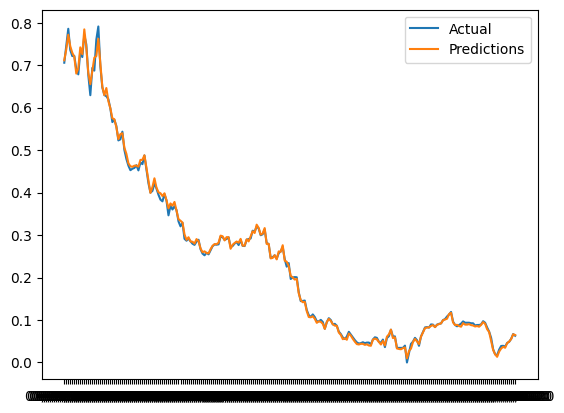

MSE:  0.0000
RMSE: 0.0067
MAE: 0.0044


In [ ]:
#plot the prediction and close price
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.legend()
plt.show()



preds = model.predict(test_data[features])
mse = mean_squared_error(test_data[target], preds)
print("MSE:", f"{mse: .4f}")
rmse = np.sqrt(mse)
print("RMSE:", f"{rmse:.4f}")
mae = mean_absolute_error(test_data[target], preds)
print("MAE:",  f"{mae:.4f}")






Random Forest Regressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(train_data[features], train_data[target])


RandomForestRegressor()

In [ ]:
#make and show prediction on test data
predictions=model.predict(test_data[features])
print('Model Predictions:')
print(predictions)
# show the models accuracy
accuracy=model.score(test_data[features], test_data[target])
print('Model Accuracy:', accuracy)



Model Predictions:
[0.70936642 0.75241761 0.79236956 0.73961357 0.72776089 0.71985092
 0.64821499 0.69556689 0.7535357  0.72950667 0.7777805  0.71769812
 0.67425951 0.64215869 0.69387995 0.74277168 0.71444194 0.76359847
 0.70228521 0.64733229 0.62633386 0.64788643 0.61146038 0.57371028
 0.56320126 0.5616222  0.54051098 0.52372989 0.5362348  0.52887897
 0.49468419 0.48024225 0.46474107 0.46609455 0.46609455 0.47194488
 0.45175069 0.46958121 0.47785896 0.47731954 0.48248823 0.4440712
 0.40838074 0.38997156 0.40470773 0.41610926 0.40016673 0.39036877
 0.38860828 0.38807866 0.39462044 0.36544723 0.36360337 0.36532464
 0.36851216 0.3685563  0.33829443 0.32658395 0.32893291 0.30520302
 0.30030894 0.27943801 0.2914133  0.27935955 0.27670655 0.27759415
 0.29282562 0.27150353 0.26391232 0.26229404 0.2614947  0.26127403
 0.2636377  0.26912515 0.27363672 0.27375932 0.27497058 0.28610239
 0.29547862 0.29420361 0.2840869  0.29470381 0.28545508 0.26949784
 0.27602982 0.2795459  0.27680463 0.28430267

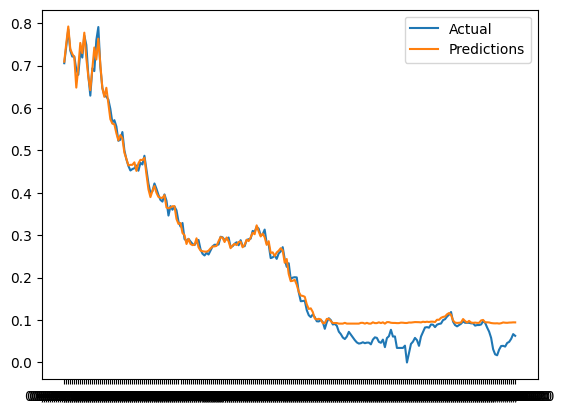

MSE:  0.0006
RMSE: 0.0254
MAE: 0.0174


In [ ]:

#plot the prediction and close price
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.legend()
plt.show()



preds = model.predict(test_data[features])
mse = mean_squared_error(test_data[target], preds)
print("MSE:", f"{mse: .4f}")
rmse = np.sqrt(mse)
print("RMSE:", f"{rmse:.4f}")
mae = mean_absolute_error(test_data[target], preds)
print("MAE:",  f"{mae:.4f}")







Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(train_data[features], train_data[target])


GradientBoostingRegressor()

In [ ]:
#make and show prediction on test data
predictions=model.predict(test_data[features])
print('Model Predictions:')
print(predictions)
# show the models accuracy
accuracy=model.score(test_data[features], test_data[target])
print('Model Accuracy:', accuracy)



Model Predictions:
[0.71370079 0.74682888 0.79114658 0.73812383 0.73157453 0.71839355
 0.66433997 0.69763073 0.75350099 0.72964774 0.77834594 0.72114965
 0.6747133  0.66210588 0.69235725 0.72927583 0.7227204  0.75679707
 0.68903212 0.64935065 0.6363082  0.64741909 0.61504262 0.57638924
 0.56114944 0.55804949 0.53633818 0.51357202 0.52653011 0.52202613
 0.48035332 0.4680829  0.46664889 0.4674365  0.47820357 0.48090896
 0.46673135 0.47414091 0.47788517 0.48077849 0.48077849 0.44432396
 0.40428616 0.3927854  0.39869505 0.42571104 0.40098301 0.38888576
 0.38967337 0.39081988 0.39984056 0.37333283 0.37317953 0.37569553
 0.37191381 0.37191381 0.34969777 0.33092272 0.33206923 0.29998896
 0.29195952 0.28381403 0.28852948 0.28414573 0.28172097 0.27516233
 0.28628793 0.27009698 0.26028156 0.25845581 0.25845581 0.25969436
 0.25969436 0.2651024  0.27737132 0.27850735 0.2750971  0.28384022
 0.29481668 0.29239819 0.28275887 0.29239819 0.28351777 0.2656324
 0.27471634 0.28044144 0.27834839 0.28197687

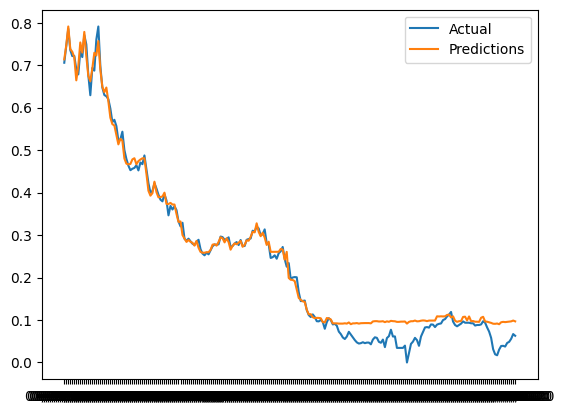

MSE:  0.0007
RMSE: 0.0263
MAE: 0.0184


In [ ]:
#plot the prediction and close price
plt.plot(test_data['Date'], test_data['Close'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.legend()
plt.show()



preds = model.predict(test_data[features])
mse = mean_squared_error(test_data[target], preds)
print("MSE:", f"{mse: .4f}")
rmse = np.sqrt(mse)
print("RMSE:", f"{rmse:.4f}")
mae = mean_absolute_error(test_data[target], preds)
print("MAE:",  f"{mae:.4f}")





